# Simulator behaviour assessment

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

All the data here are tested on a subset of a Vueling schedule.  The used scheduled contains 6 aircraft.

## No artificial delay

In [2]:
zero = pd.read_parquet("~/workspace/vcs/disman_art/out/vli10k_idle.parquet")
flights_per_ep = zero.flight.max()
episodes = zero.episode.max()
totflights = zero.flight.count()
delayed = zero.query("dep_del > 15")
zero.columns

Index(['action', 'atfm', 'cost', 'cum_reward', 'dep_del', 'dep_dest',
       'dep_duration', 'dep_orig', 'dep_sobt', 'flight', 'misc', 'q',
       'reac_del', 'reward', 'sev_added', 'sev_dels', 'swap', 'swapwith',
       'tail_num', 'taxi', 'time', 'visitcount', 'episode'],
      dtype='object')

### Quantitative values

In [3]:
print("{:.2f}%".format(100 * delayed.flight.count() / zero.flight.count()))

21.21%


### Delays stats

* Reactionary delay distribution

In [4]:
zero.reac_del.quantile(q=0.1), zero.reac_del.quantile(q=0.5), zero.reac_del.quantile(q=0.7), zero.reac_del.quantile(q=0.9)

(0.0, 0.0, 0.0, 12.0)

* Departure delay

In [6]:
zero.dep_del.quantile(q=0.1), zero.dep_del.quantile(q=0.5), zero.dep_del.quantile(q=0.7), zero.dep_del.quantile(q=0.9)

(0.0, 0.0, 10.0, 37.0)

In [5]:
print("{:.2f}min, {:.2f}min".format(zero.reac_del.mean(), zero.dep_del.mean()))

3.97min, 11.04min


* Delay among delayed flights

In [152]:
print("{:.2f}min".format(delayed.dep_del.mean()))

39.35min


In [8]:
(delayed.dep_del.quantile(q=0.1), delayed.dep_del.quantile(q=0.5), delayed.dep_del.quantile(q=0.7),
delayed.dep_del.quantile(q=.9))

(18.0, 32.0, 45.0, 70.0)

* Proportion of reactionary delay among all delays

In [153]:
print("{:.2f}%".format(100 * delayed.reac_del.sum() / delayed.dep_del.sum()))

39.69%


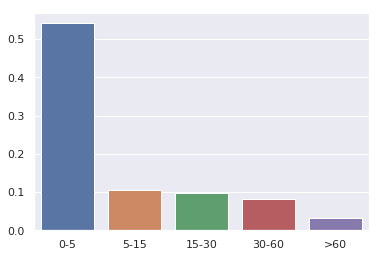

In [154]:
sns.barplot(["0-5", "5-15", "15-30", "30-60", ">60"],
    [len(zero.query("dep_del < 5")) / totflights,
     len(zero.query("5 < dep_del <= 15")) / totflights,
     len(zero.query("15 < dep_del <= 30")) / totflights,
     len(zero.query("30 < dep_del <= 60")) / totflights,
     len(zero.query("dep_del > 60")) / totflights])

### Delay per delayed flight

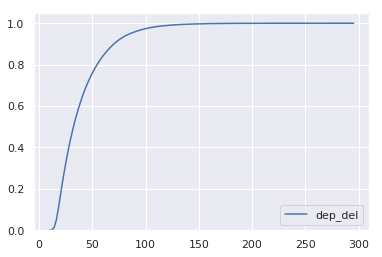

In [155]:
sns.kdeplot(delayed.dep_del, cumulative=True, legend=True)

## With artificial delay, of probability 2%

In [156]:
twopc = pd.read_parquet("/home/gabriel/workspace/vcs/disman_art/out/vli10k_idle_0.02.parquet")
tdelayed = twopc.query("dep_del >= 15")

In [157]:
print("{:.2f}%".format(100 * len(tdelayed) / len(twopc)))

27.06%
